# Deviner la langue d'un texte (correction)

Calcul d'un score pour détecter la langue d'un texte. Ce notebook aborde les dictionnaires, les fichiers et les graphiques (correction).

In [2]:
%matplotlib inline

## Q1 : lire un fichier

In [3]:
def read_file(filename):
    with open(filename, "r", encoding="utf-8") as f:
        return f.read()

Les problèmes d'[encoding](https://fr.wikipedia.org/wiki/Codage_des_caract%C3%A8res) sont toujours délicats. Un encoding définit la façon dont une séquence d'octets représente une chaîne de caractères. Il y a 256 valeurs possible d'octets et la langue chinoise contient beaucoup plus de caractères. Il faut donc utiliser plusieurs octets pour représenter un caractère un peu comme le Morse qui n'utilise que deux symboles pour représenter 26 lettres. Quand on ne connaît pas l'encoding, on utilise un module [chardet](http://chardet.readthedocs.io/en/latest/index.html) et la fonction [detect](http://chardet.readthedocs.io/en/latest/usage.html).

In [4]:
import chardet


def read_file_enc(filename):
    with open(filename, "rb") as f:
        b = f.read()
    res = chardet.detect(b)
    enc = res["encoding"]
    return res, b.decode(enc)

On teste la fonction avec un petit fichier qu'on crée pour l'occasion.

In [5]:
with open("texte.txt", "w", encoding="utf-8") as f:
    f.write("un corbeau sur un arbre perché tenait en son bec un fromage")

In [6]:
lu = read_file("texte.txt")
lu

'un corbeau sur un arbre perché tenait en son bec un fromage'

In [7]:
enc, lu = read_file_enc("texte.txt")
lu

'un corbeau sur un arbre perchÃ© tenait en son bec un fromage'

Visiblement, ce n'est pas toujours évident mais suffisant pour ce qu'on veut en faire à savoir des statistiques. Les problèmes avec la langue latine devraient être statistiquement négligeables pour ce que nous souhaitons en faire.

In [8]:
enc

{'confidence': 0.6213765491709115,
 'encoding': 'ISO-8859-9',
 'language': 'Turkish'}

## Q2 : histogramme

In [9]:
def histogram(texte):
    d = {}
    for c in texte:
        d[c] = d.get(c, 0) + 1
    return d

In [10]:
histogram(lu)

{' ': 11,
 'a': 4,
 'b': 3,
 'c': 3,
 'e': 7,
 'f': 1,
 'g': 1,
 'h': 1,
 'i': 1,
 'm': 1,
 'n': 6,
 'o': 3,
 'p': 1,
 'r': 6,
 's': 2,
 't': 2,
 'u': 5,
 '©': 1,
 'Ã': 1}

Le module [collections](https://docs.python.org/3/library/collections.html) propose un objet [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) qui implémente ce calcul.

In [11]:
from collections import Counter


def histogram2(texte):
    return Counter(texte)


histogram2(lu)

Counter({' ': 11,
         'a': 4,
         'b': 3,
         'c': 3,
         'e': 7,
         'f': 1,
         'g': 1,
         'h': 1,
         'i': 1,
         'm': 1,
         'n': 6,
         'o': 3,
         'p': 1,
         'r': 6,
         's': 2,
         't': 2,
         'u': 5,
         '©': 1,
         'Ã': 1})

Comme pour beaucoup de fonctions faisant partie des extensions du langage Python, elle est plus rapide que la version que nous pourrions implémenter.

In [12]:
%timeit histogram(lu)

13.8 µs ± 1.17 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [13]:
%timeit histogram2(lu)

7.56 µs ± 546 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Q3 : normalisation

In [14]:
def normalize(hist):
    s = sum(hist.values())
    if s == 0:
        return {}
    else:
        return {k: v / s for k, v in hist.items()}


normalize(histogram2(lu))

{' ': 0.18333333333333332,
 'a': 0.06666666666666667,
 'b': 0.05,
 'c': 0.05,
 'e': 0.11666666666666667,
 'f': 0.016666666666666666,
 'g': 0.016666666666666666,
 'h': 0.016666666666666666,
 'i': 0.016666666666666666,
 'm': 0.016666666666666666,
 'n': 0.1,
 'o': 0.05,
 'p': 0.016666666666666666,
 'r': 0.1,
 's': 0.03333333333333333,
 't': 0.03333333333333333,
 'u': 0.08333333333333333,
 '©': 0.016666666666666666,
 'Ã': 0.016666666666666666}

## Q4 : calcul

On essaye avec la fréquence de la lettre ``H``. (données : [articles.zip](http://http://www.xavierdupre.fr/enseignement/complements/articles.zip))

In [15]:
from teachpyx.tools.data_helper import download_and_unzip

url = "https://github.com/sdpython/teachpyx/raw/td/_data/articles.zip"
texts = download_data(url)

h = {text: normalize(histogram2(read_file_enc(text)[1])).get("h", 0) for text in texts}
h

{'afp1.txt': 0.0067247820672478205,
 'afp2.txt': 0.007575757575757576,
 'arthur_charpentier1.txt': 0.007012142979305627,
 'arthur_charpentier2.txt': 0.02588801926550271,
 'arthur_charpentier3.txt': 0.004853022739877981,
 'blog1.txt': 0.010752688172043012,
 'blog2.txt': 0.007556675062972292,
 'blog3.txt': 0.010554089709762533,
 'blogny1.txt': 0.029830508474576273,
 'elpais1.txt': 0.01349112426035503,
 'elpais2.txt': 0.005625270445694505,
 'elpais3.txt': 0.005441436539246361,
 'elpais4.txt': 0.00224408769204212,
 'elpais5.txt': 0.009715025906735751,
 'elpais6.txt': 0.0051919661155895615,
 'elpais7.txt': 0.005625270445694505,
 'inconnu1.txt': 0,
 'inconnu2.txt': 0.00016849199663016007,
 'lemonde1.txt': 0.010804020100502512,
 'lemonde10.txt': 0.007139797229758675,
 'lemonde11.txt': 0.0021551724137931034,
 'lemonde2.txt': 0.0055272108843537416,
 'lemonde3.txt': 0.0014691478942213516,
 'lemonde4.txt': 0.004875076173065204,
 'lemonde5.txt': 0.0044822949350067235,
 'lemonde6.txt': 0.0070345474

On regarde les valeurs obtenus pour les articles du monde et du new-york time.

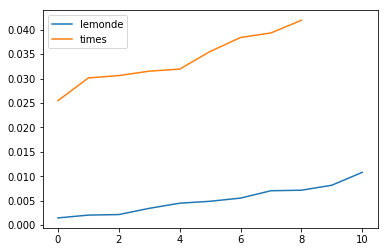

In [16]:
import matplotlib.pyplot as plt

lemonde = list(sorted(v for k, v in h.items() if "lemonde" in k))
ny = list(sorted(v for k, v in h.items() if "times" in k))
plt.plot(lemonde, label="lemonde")
plt.plot(ny, label="times")
plt.legend()

Ca marche plutôt bien.

## Q5 : score

On recommence avec deux lettres et on trace un nuage de points pour les articles des mêmes journaux.

In [17]:
scores = {}
for text in texts:
    norm = normalize(histogram2(read_file_enc(text)[1]))
    h, w = norm.get("h", 0), norm.get("w", 0)
    scores[text] = (h, w)

lem = [v for k, v in scores.items() if "lemonde" in k]
ny = [v for k, v in scores.items() if "times" in k]

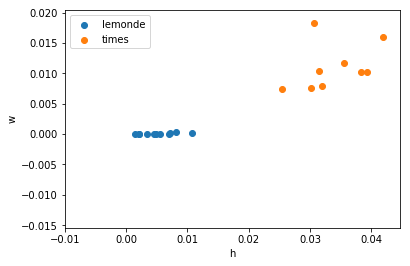

In [18]:
plt.scatter(x=[_[0] for _ in lem], y=[_[1] for _ in lem], label="lemonde")
plt.scatter(x=[_[0] for _ in ny], y=[_[1] for _ in ny], label="times")
plt.xlabel("h")
plt.ylabel("w")
plt.legend()

Les textes anglais et français apparaissent bien séparés. On place les autres.

In [19]:
other = [v for k, v in scores.items() if "times" not in k and "monde" not in k]

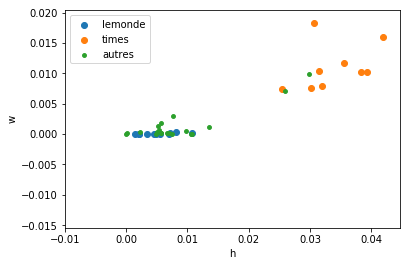

In [20]:
plt.scatter(x=[_[0] for _ in lem], y=[_[1] for _ in lem], label="lemonde")
plt.scatter(x=[_[0] for _ in ny], y=[_[1] for _ in ny], label="times")
plt.scatter(x=[_[0] for _ in other], y=[_[1] for _ in other], label="autres", s=15)
plt.xlabel("h")
plt.ylabel("w")
plt.legend()

On ajoute le nom du texte sur le graphique.

In [21]:
text_others = [k for k, v in scores.items() if "times" not in k and "monde" not in k]

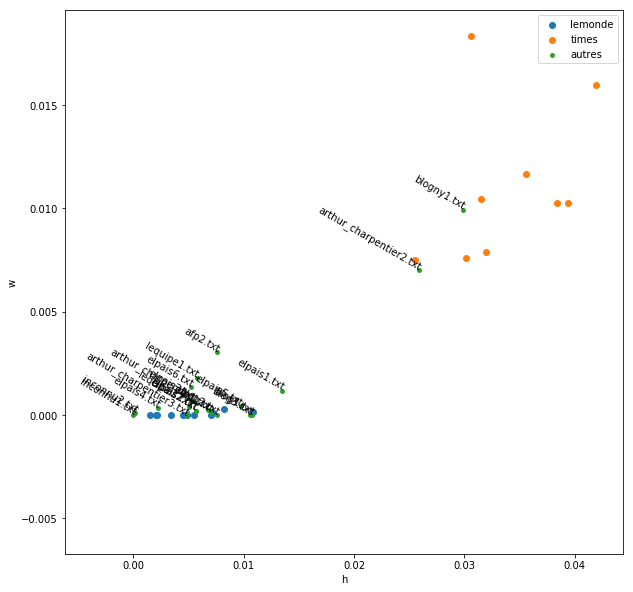

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(x=[_[0] for _ in lem], y=[_[1] for _ in lem], label="lemonde")
ax.scatter(x=[_[0] for _ in ny], y=[_[1] for _ in ny], label="times")
ax.scatter(x=[_[0] for _ in other], y=[_[1] for _ in other], label="autres", s=15)
for (x, y), t in zip(other, text_others):
    ax.text(x, y, t, ha="right", rotation=-30, wrap=True)
ax.set_xlabel("h")
ax.set_ylabel("w")
ax.legend()